## 形态学
### Erosion腐蚀
其原理实在原图的小区域里取最小值，形态学的的操作也是通过卷积来实现，可以用cv2.getStructuringElement()来生成不同形状的结构元素。

### Dilation膨胀
与腐蚀相反，取局部区域最大值

### Opeing 开运算
先腐蚀后膨胀，其作用是消除小白点，通过cv2.morpholoygEx()

### Closing 闭运算
与开运算相反，先膨胀后腐蚀，其作用是消除小黑点


### Gradient 形态学梯度
膨胀图减去腐蚀图,

### Top Hat顶帽/White Hat白帽
原图减去开运算之后的 src - opening, 返回被去掉的白色的点

### Black Hat黑帽
原图减去开运算之后的 closing - src，返回被去掉的黑色的点

In [6]:
import cv2 as cv
from utils.im import *

In [11]:
kernel1 = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
print("kernel1 \n", kernel1)

kernel2 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
print("kernel2 \n", kernel2)

kernel3 = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))
print("kernel3 \n", kernel3)

kernel1 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
kernel2 
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
kernel3 
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


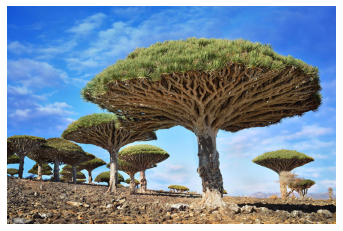

In [12]:
image = cv.imread("./images/tree.jpeg")
show(image)

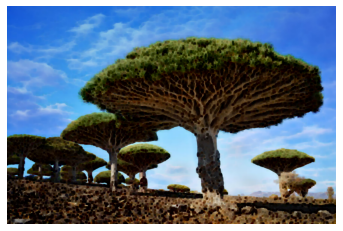

In [13]:
erosion = cv.erode(image, kernel1)
show(erosion)

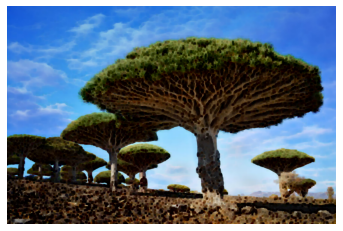

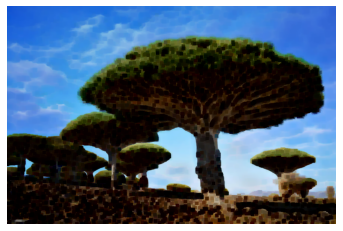

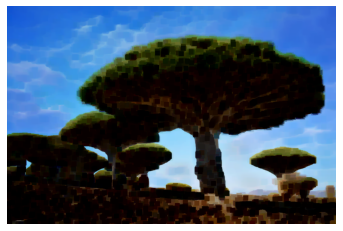

In [15]:
for i in range(3):
    erosion = cv.erode(image, kernel1, iterations= i + 1)
    show(erosion)

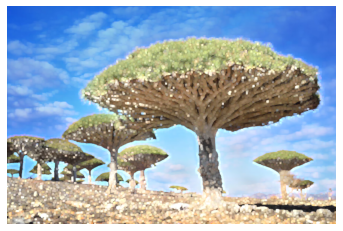

In [17]:
dilation = cv.dilate(image, kernel1)
show(dilation)

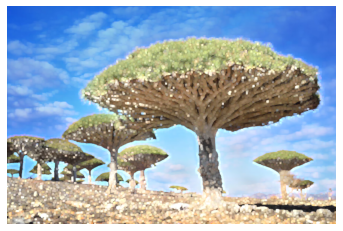

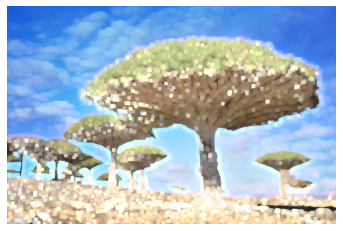

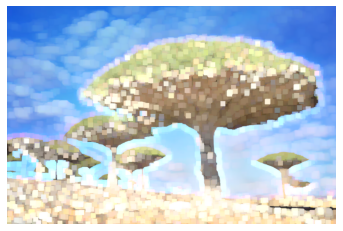

In [18]:
for i in range(3):
    dilation = cv.dilate(image, kernel1, iterations= i + 1)
    show(dilation)

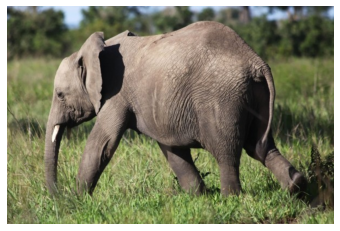

In [19]:
img = cv.imread("./images/imagenet/elephant.jpg")
show(img)

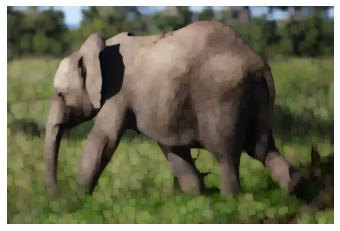

In [22]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel1, iterations=2)
show(opening)

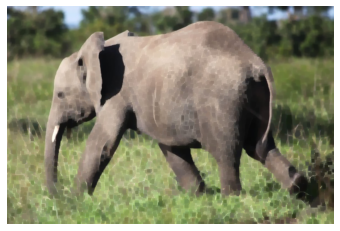

In [23]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel1)
show(closing)

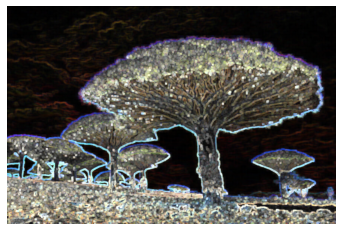

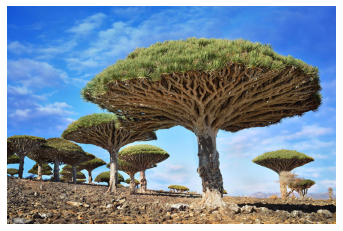

In [30]:
img = cv.imread("./images/tree.jpeg")
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel1)
show(gradient)
show(img)

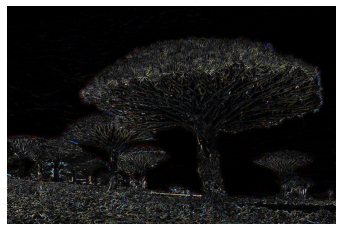

In [29]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel1)
show(tophat)

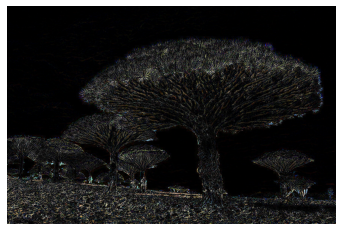

In [31]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel1)
show(blackhat)